In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['country']=lb.fit_transform(df['country'])
df.dtypes

country         int64
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
x=df

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(x)
  wcss.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[117460075577.07816, 36528776020.05545, 21710595457.687172, 14611098544.670849, 10655762687.58318, 7656107906.765139, 5354145848.139883, 4259274595.992479, 3228942333.4617677, 2669558363.461351]


Text(0.5, 1.0, 'KMeans - elbow graph')

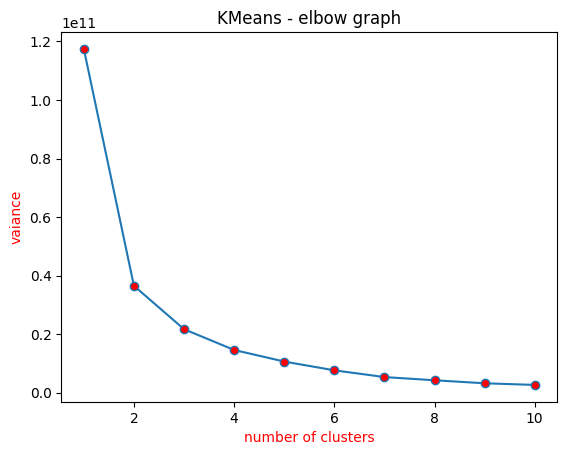

In [ ]:
plt.plot(range(1,11),wcss,marker='o',mfc='r')
plt.xlabel('number of clusters',color='r')
plt.ylabel('vaiance',color='r')
plt.title('KMeans - elbow graph')

In [ ]:
#no of clusters=7
model1=KMeans(n_clusters=7,init='k-means++',random_state=42)
model1.fit(x)
y_pred=model1.predict(x)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 6, 0, 6, 0, 0, 6, 1, 1, 0, 3, 3, 6, 0, 0, 1, 6, 6, 6, 6, 6, 0,
       0, 5, 0, 6, 6, 6, 6, 1, 6, 6, 6, 0, 6, 0, 6, 6, 6, 0, 6, 0, 3, 3,
       1, 0, 6, 6, 6, 3, 6, 0, 6, 1, 1, 0, 6, 6, 1, 6, 3, 0, 6, 6, 6, 6,
       6, 0, 1, 6, 6, 0, 0, 1, 3, 1, 6, 1, 6, 0, 6, 6, 5, 6, 6, 0, 0, 6,
       6, 3, 0, 4, 0, 6, 6, 0, 0, 6, 3, 6, 0, 6, 6, 6, 0, 6, 6, 6, 6, 6,
       1, 3, 6, 6, 4, 3, 6, 0, 6, 6, 6, 0, 3, 2, 0, 0, 6, 6, 3, 6, 0, 0,
       6, 5, 3, 3, 6, 0, 3, 3, 6, 0, 6, 0, 1, 4, 6, 6, 0, 6, 6, 6, 6, 0,
       6, 6, 6, 5, 1, 1, 0, 6, 6, 0, 6, 6, 6], dtype=int32)

In [ ]:
df['Output']=y_pred
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Output
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,6
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,6
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,6
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,6
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,6
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,6


In [ ]:
x=df.iloc[:,:-1].values
x

array([[0.00e+00, 9.02e+01, 1.00e+01, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.00e+00, 1.66e+01, 2.80e+01, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.00e+00, 2.73e+01, 3.84e+01, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [1.64e+02, 2.33e+01, 7.20e+01, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [1.65e+02, 5.63e+01, 3.00e+01, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [1.66e+02, 8.31e+01, 3.70e+01, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [ ]:
y=df.iloc[:,-1]
y

0      6
1      6
2      0
3      6
4      0
      ..
162    6
163    0
164    6
165    6
166    6
Name: Output, Length: 167, dtype: int32

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
model2=SVC()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([1, 6, 0, 6, 6, 3, 6, 0, 6, 0, 6, 6, 6, 6, 1, 6, 6, 0, 6, 6, 6, 1,
       0, 0, 1, 1, 0, 0, 0, 6, 6, 1, 6, 3, 6, 3, 6, 0, 0, 6, 6, 0, 6, 0,
       0, 6, 0, 6, 1, 0, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred2)
score

0.9019607843137255